In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-by-countries-2025/Wolrd Population Data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/kaggle/input/world-population-by-countries-2025/Wolrd Population Data.csv")
df.head()

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %


In [4]:
df=df.drop(["Rank","Country","World Share","Urban Pop %",],axis=1)
df.tail()

,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
229,"4,389",-0.70 %,-31,44,100,-7,1.4,42
230,"3,470",-0.20 %,-7,0,"12,170",-13,1.7,42
231,"2,506",4.55 %,109,251,10,72,2.6,27
232,"1,819",0.11 %,2,7,260,10,2.5,36
233,496,0.00 %,0,"1,240",0,18,1.0,59


In [5]:

df.replace('N.A.', pd.NA, inplace=True)

In [6]:
df.isnull().sum()

Population (2024)    0
Yearly Change        0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
dtype: int64

In [7]:
df.info()
df = df.dropna()  
df['Yearly Change'] = df['Yearly Change'].replace({'%': '', ',': ''}, regex=True).astype(float) / 100
df['Population (2024)'] = df['Population (2024)'].replace({'%': '', ',': ''}, regex=True).astype(int)
df['Net Change'] = df['Population (2024)'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['Density (P/Km²)'] = df['Population (2024)'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['Land Area (Km²)'] = df['Population (2024)'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['Migrants (net)'] = df['Population (2024)'].replace({'%': '', ',': ''}, regex=True).astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population (2024)  234 non-null    object 
 1   Yearly Change      234 non-null    object 
 2   Net Change         234 non-null    object 
 3   Density (P/Km²)    234 non-null    object 
 4   Land Area (Km²)    234 non-null    object 
 5   Migrants (net)     234 non-null    object 
 6   Fert. Rate         234 non-null    float64
 7   Med. Age           234 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 14.8+ KB


In [8]:
df.head()

,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
0,1450935791,0.0089,1.450936e+09,1.450936e+09,1.450936e+09,1.450936e+09,2.0,28
1,1419321278,-0.0023,1.419321e+09,1.419321e+09,1.419321e+09,1.419321e+09,1.0,40
2,345426571,0.0057,3.454266e+08,3.454266e+08,3.454266e+08,3.454266e+08,1.6,38
3,283487931,0.0082,2.834879e+08,2.834879e+08,2.834879e+08,2.834879e+08,2.1,30
4,251269164,0.0152,2.512692e+08,2.512692e+08,2.512692e+08,2.512692e+08,3.5,20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population (2024)  234 non-null    int64  
 1   Yearly Change      234 non-null    float64
 2   Net Change         234 non-null    float64
 3   Density (P/Km²)    234 non-null    float64
 4   Land Area (Km²)    234 non-null    float64
 5   Migrants (net)     234 non-null    float64
 6   Fert. Rate         234 non-null    float64
 7   Med. Age           234 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 14.8 KB


<Axes: >

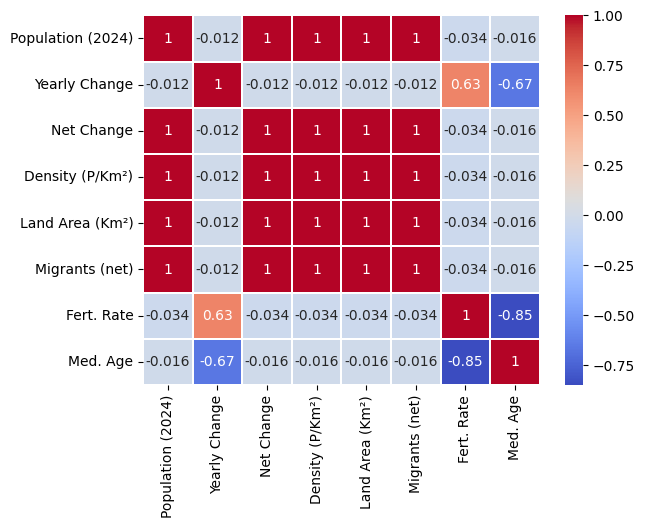

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1)

<Axes: xlabel='Population (2024)', ylabel='count'>

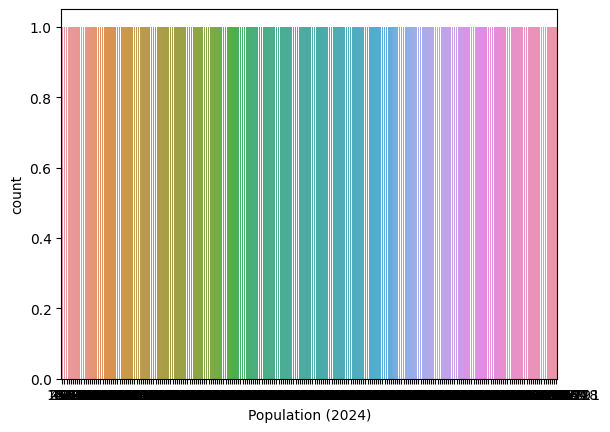

In [11]:
sns.countplot(x="Population (2024)",data=df)


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population (2024),234.0,3.487407e+07,1.383471e+08,496.0000,478260.0000,5.615064e+06,2.346508e+07,1.450936e+09
Yearly Change,234.0,9.423932e-03,1.367075e-02,-0.0504,0.0001,8.600000e-03,1.875000e-02,5.070000e-02
Net Change,234.0,3.487407e+07,1.383471e+08,496.0000,478260.0000,5.615064e+06,2.346508e+07,1.450936e+09
Density (P/Km²),234.0,3.487407e+07,1.383471e+08,496.0000,478260.0000,5.615064e+06,2.346508e+07,1.450936e+09
Land Area (Km²),234.0,3.487407e+07,1.383471e+08,496.0000,478260.0000,5.615064e+06,2.346508e+07,1.450936e+09
Migrants (net),234.0,3.487407e+07,1.383471e+08,496.0000,478260.0000,5.615064e+06,2.346508e+07,1.450936e+09
Fert. Rate,234.0,2.332051e+00,1.163002e+00,0.7000,1.5000,2.000000e+00,2.975000e+00,6.000000e+00
Med. Age,234.0,3.167949e+01,9.810427e+00,14.0000,23.0000,3.250000e+01,4.000000e+01,5.900000e+01


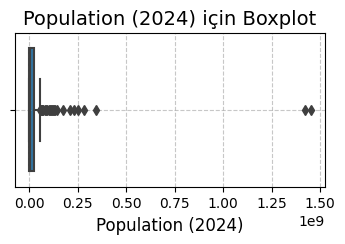

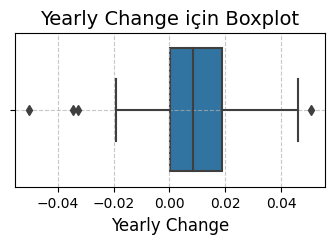

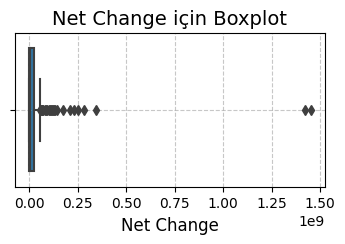

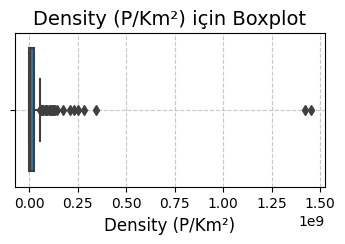

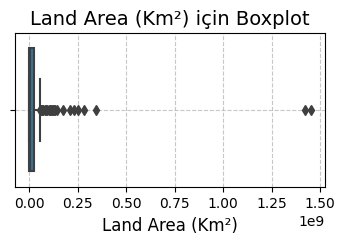

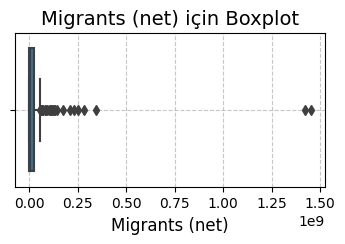

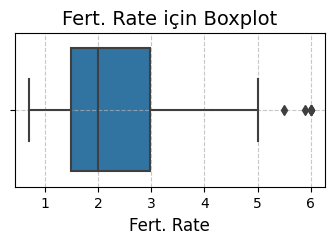

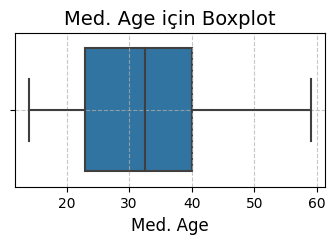

In [13]:
for col in df:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f'{col} için Boxplot', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [14]:
y=df["Population (2024)"]
x=df.drop(["Population (2024)"],axis=1)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)



In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest - MSE:", rf_mse)
print("Random Forest - R²:", rf_r2)

Random Forest - MSE: 1732547470311.7034
Random Forest - R²: 0.9983162349622771
